Solar energy plays a crucial role in reducing reliance on fossil fuels as an important source of renewable energy. understanding the factors that influences efficiency of solar power systems becomes important for optimizing energy generation. my project aims to analyze various weather conditions and their effects on solar energy generation.
the dataset for my project consist of historical weather data and energy generation information recorded at 15-minute intervals.
https://www.kaggle.com/datasets/sheemazain/renewable-power-generation-weather-condition-2024
The dataset consists of 196,776 rows and 17 columns. It contains hourly records of solar energy generation and various weather metrics. The key columns are: 
- Energy delta[Wh]: The solar energy generated (target variable) 
- GHI: Global Horizontal Irradiance (solar radiation) 
- temp: Temperature in degrees Celsius 
- clouds_all: Cloud coverage percentage 
- wind_speed: Wind speed in m/s 
- rain_1h and snow_1h: Rain and snow precipitation in the last hour (in mm) 
- sunlightTime and dayLength: Time of sunlight and total day length in seconds Other features such as `hour` and `month` can help analyze temporal trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D://classes/ai/pr/fdata/archive/Renewable.csv")
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [4]:
#Converting "Time" column to datetime since its object, and then setting this column as index

df["Time"]=pd.to_datetime(df["Time"])
df.set_index("Time",inplace=True)

#Converting "hour" and "month" to category
df["hour"]=df["hour"].astype("category")
df["month"]=df["month"].astype("category")

In [5]:
#Checking for missing values
df.isnull().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [6]:
# since the dataset dose not have any missing values i will inject some!
# defining the percentage of NaNs i want to inject (1% of total cells)
total_cells=df.shape[0]*df.shape[1]
number_of_nans=int(total_cells*0.01)
#injecting NaNs
for _ in range(number_of_nans):
    i=np.random.randint(0,df.shape[0])
    j=np.random.randint(0,df.shape[1])
    if df.columns[j] not in ["hour","month","dayLength","weather_type"]:  #i dont want to inject in these columns
        df.iloc[i,j]=None

In [7]:
df.isnull().sum()

Energy delta[Wh]          1976
GHI                       2044
temp                      1940
pressure                  1871
humidity                  1999
wind_speed                2016
rain_1h                   1915
snow_1h                   1957
clouds_all                1947
isSun                     1904
sunlightTime              1957
dayLength                    0
SunlightTime/daylength    1993
weather_type                 0
hour                         0
month                        0
dtype: int64

In [9]:
# Handling NaN values based on data types
# for numerical columns:
numeric_columns=["Energy delta[Wh]","GHI","temp","pressure","humidity","wind_speed","rain_1h","snow_1h","clouds_all","sunlightTime","SunlightTime/daylength"]
for col in numeric_columns:
    df[col].fillna(df[col].mean(),inplace=True) #filling any NaN values in the columns with the mean of the column's values

# for binary columns:
df["isSun"].fillna(df["isSun"].mode()[0],inplace=True) # filling NaN values in "isSun" column with mode of the column

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\3629859645.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True) #filling any NaN values in the columns with the mean of the column's values
C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\3629859645.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

In [11]:
df.isna().sum().sum()

np.int64(0)

In [12]:
# Summary statistics
df.describe()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.045560,32.577502,9.791335,1015.297709,79.815943,3.937615,0.065914,0.007154,65.986029,0.524459,211.705429,748.644347,0.265174,3.198398
std,1039.615354,51.886067,7.956941,9.538336,15.521606,1.812575,0.277219,0.069462,36.442826,0.499403,272.493290,194.870208,0.327353,1.289939
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000
25%,0.000000,0.000000,3.700000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000
50%,0.000000,2.400000,9.400000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,45.000000,765.000000,0.060000,4.000000
75%,573.045560,45.900000,15.600000,1021.000000,92.000000,5.000000,0.000000,0.000000,99.000000,1.000000,390.000000,930.000000,0.520000,4.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000


- high standard deviation for GHI (51.89, which is greater than the mean (32.58)) suggests significant fluctuations in solar irradiance, which is expected due to its dependence on time and weather conditions.
- temperature ranges from -16.6°C to 35.8°C, indicating diverse weather conditions, also the median temperature (9.4°C) is close to the mean (9.79°C) suggesting a somewhat balanced distribution.
- Both rain and snow averages are close to zero,However rain can reach up to 8.09 mm in one hour, and snow up to 2.82 mm, which could be significant for short periods.
- isSun With a mean of 0.524, indicates that sunlight is present roughly half of the time
- SunlightTime/Daylength has a mean of 0.265 suggesting that on average about a quarter of the day length has effective sunlight time.

In [13]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
Time,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.00000,0.0,1.600000,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450,0.0,4,0,1
2017-01-01 00:15:00,573.04556,0.0,1.600000,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450,0.0,4,0,1
2017-01-01 00:30:00,0.00000,0.0,1.600000,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450,0.0,4,0,1
2017-01-01 00:45:00,0.00000,0.0,1.600000,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450,0.0,4,0,1
2017-01-01 01:00:00,0.00000,0.0,9.791335,1020.0,100.0,5.2,0.0,0.0,100.0,0.0,0.0,450,0.0,4,1,1


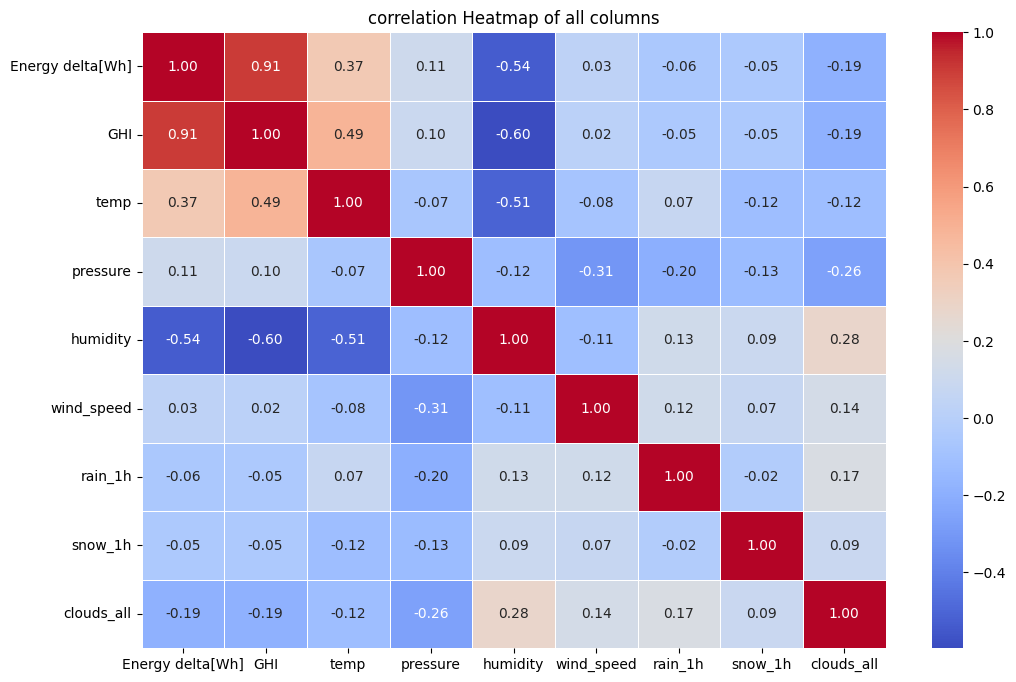

In [30]:
#Correlation between main features
selected_columns=["Energy delta[Wh]","GHI","temp","pressure","humidity","wind_speed","rain_1h","snow_1h","clouds_all"]
correlation_matrix=df[selected_columns].corr()
#Visualizing
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("correlation Heatmap of all columns")
plt.show()

Question 1: What is the relationship between temperature and solar energy generation?

In [14]:
#Correlation between temperature and energy generation
tempenergy_correlation=df[["temp","Energy delta[Wh]"]].corr()
print("Correlation between temperature and energy generation:")
print(tempenergy_correlation)

Correlation between temperature and energy generation:
                      temp  Energy delta[Wh]
temp              1.000000          0.374838
Energy delta[Wh]  0.374838          1.000000


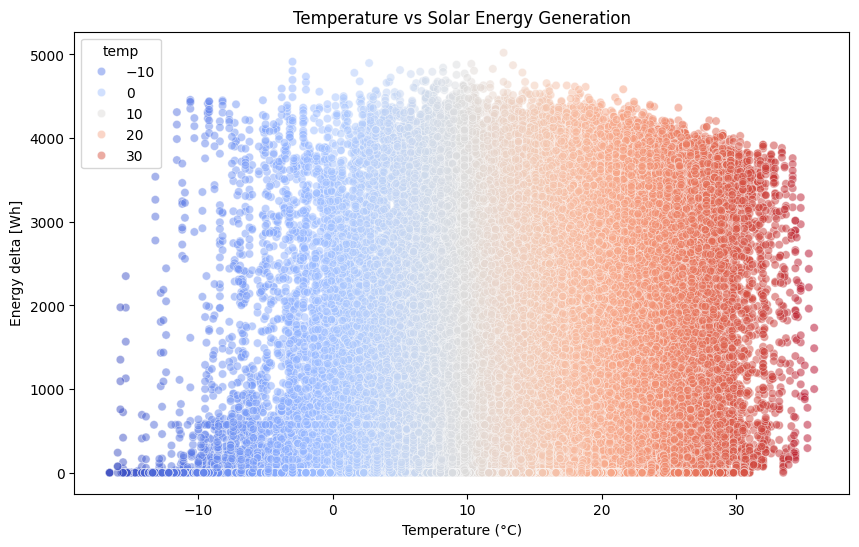

In [15]:
#visualizing the correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="temp",y="Energy delta[Wh]",alpha=0.5,hue="temp", palette="coolwarm") # putting alpha equal to 0.5 to see overlapping points
plt.title("Temperature vs Solar Energy Generation")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy delta [Wh]")
plt.show()

The correlation between temperature and solar energy generation suggests that as the temperature increases, solar energy generation tends to increase as well but not perfectly indicating that while temperature plays a role in energy generation, it's not the ony factor and Other variables such as GHI and cloud cover likely have a significant influence on energy production as well. very high temperatures can reduce the efficiency of solar panels, which might explain why the correlation is not stronger than 0.374.

Question 2: How does solar radiation (GHI) impact energy generation throughout different times of the day?

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\1254242318.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_data=df.groupby("hour")[["GHI","Energy delta[Wh]"]].mean().reset_index()


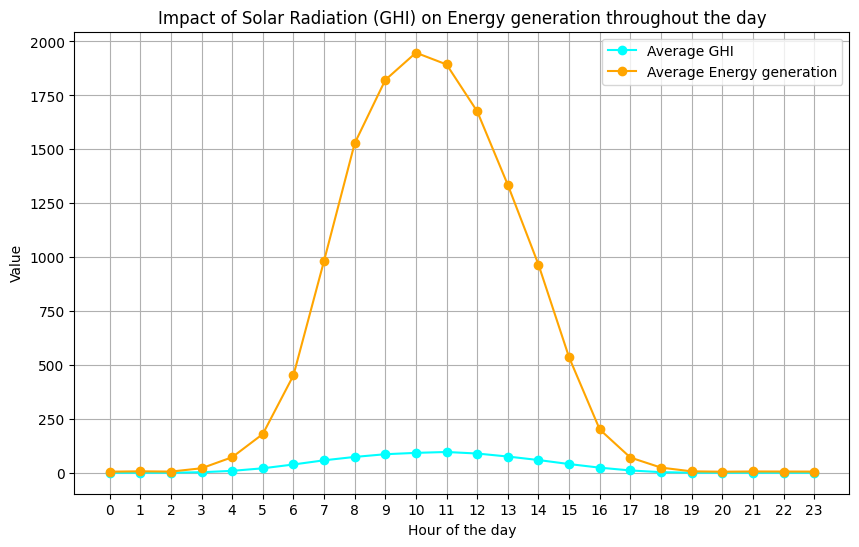

In [18]:
#Grouping data by hour and calculating the mean GHI and Energy generation for each hour

hourly_data=df.groupby("hour")[["GHI","Energy delta[Wh]"]].mean().reset_index()
#visualizing
plt.figure(figsize=(10,6))
plt.plot(hourly_data["hour"],hourly_data["GHI"],label="Average GHI",color="cyan",marker="o")
plt.plot(hourly_data["hour"],hourly_data["Energy delta[Wh]"],label="Average Energy generation",color="orange",marker="o")
plt.title("Impact of Solar Radiation (GHI) on Energy generation throughout the day")
plt.xlabel("Hour of the day")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(hourly_data["hour"])
plt.show()

In [20]:
correlation_hourly=df.groupby("hour")[["GHI","Energy delta[Wh]"]].corr().iloc[0::2, -1].reset_index()  #Selecting every second row starting from the first(0) and the last column(-1)
correlation_hourly.columns=["hour","drop","Correlation"]  #Renaming Columns
correlation_hourly.drop("drop",axis=1,inplace=True)  #dropping the drop column which was a placeholder
correlation_hourly

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\108879690.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_hourly=df.groupby("hour")[["GHI","Energy delta[Wh]"]].corr().iloc[0::2, -1].reset_index()  #Selecting every second row starting from the first(0) and the last column(-1)


,hour,Correlation
0,0,-0.009466
1,1,-0.000043
2,2,-0.005543
3,3,0.327406
4,4,0.682609
5,5,0.760361
6,6,0.856994
7,7,0.885950
8,8,0.874182
9,9,0.850954


The positive and high correlation during 5 AM - 5 PM, suggests that the GHI is a strong predictor of energy production. The low and negative correlation values suggest that during nighttime or low-light hours changes in GHI do not significantly impact energy generation, which makes sense as solar energy production is minimal or nonexistent and also highlights the importance of using this information to optimize storage or alternative energy sources during these times.

Question 3: What are the best and worst weather conditions for maximizing solar energy generation?

In [21]:
#Grouping data by clouds, rain and snow and calculating the average energy generation for each weather condition

weather_impact=df.groupby(["clouds_all","rain_1h","snow_1h"])[["Energy delta[Wh]"]].mean().reset_index()
#Sorting
best_weather_conditions=weather_impact.sort_values(by="Energy delta[Wh]",ascending=False).head(10)
worst_weather_conditions=weather_impact.sort_values(by="Energy delta[Wh]",ascending=True).head(10)
print("Best Weather Conditions for Energy Generation:")
print(best_weather_conditions)
print("\nWorst Weather Conditions for Energy Generation:")
print(worst_weather_conditions)

Best Weather Conditions for Energy Generation:
      clouds_all  rain_1h   snow_1h  Energy delta[Wh]
865         64.0     0.26  0.000000           4146.75
439         45.0     0.15  0.007154           4029.00
1875        92.0     0.31  0.007154           3877.00
238         34.0     0.15  0.000000           3829.50
392         43.0     0.10  0.000000           3819.75
24           5.0     0.11  0.000000           3794.00
11           2.0     0.20  0.000000           3787.75
708         58.0     0.12  0.000000           3648.75
301         38.0     0.18  0.000000           3643.00
424         44.0     0.36  0.000000           3638.00

Worst Weather Conditions for Energy Generation:
      clouds_all  rain_1h   snow_1h  Energy delta[Wh]
1785        90.0     0.76  0.000000               0.0
1741        89.0     1.13  0.000000               0.0
1749        90.0     0.00  0.100000               0.0
1768        90.0     0.24  0.000000               0.0
1769        90.0     0.25  0.000000     

The best weather conditions for maximizing solar energy generation occurs under minimal clouds, very light rain, and no snow which allows the most sunlight to reach the panels and optimizing energy production. on the other hand the worst weather conditions involve high cloud cover and heavy rain. These conditions block sunlight from reaching the solar panels, leading to zero or negligible energy generation. these information could help company to schedule for optimizing energy generation and maintenance considerations.

Question 4: Which months have the highest and lowest solar energy generation, and how do weather patterns influence these trends?

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\4286862150.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_energy=df.groupby("month")["Energy delta[Wh]"].sum().reset_index()
C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\4286862150.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_weather=df.groupby("month")[["clouds_all","rain_1h","snow_1h"]].mean().reset_index()


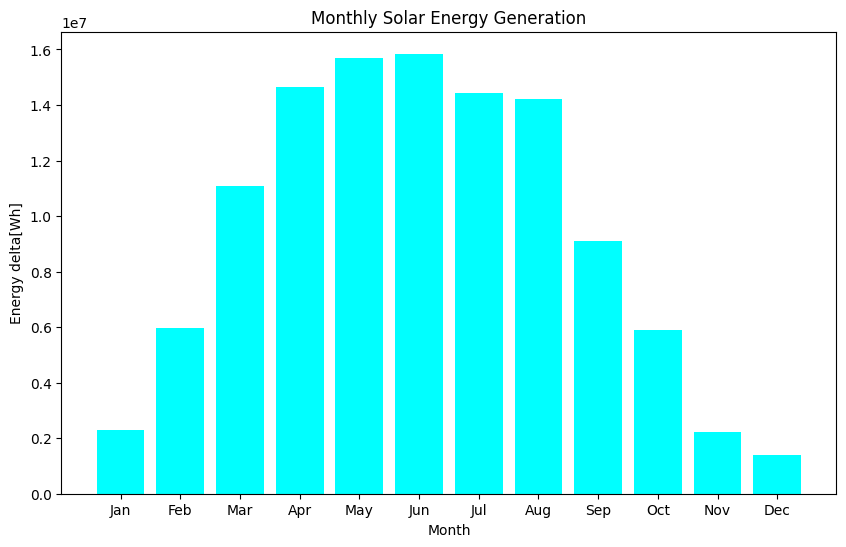

In [25]:
#Grouping data by month and summing energy generation for each month
monthly_energy=df.groupby("month")["Energy delta[Wh]"].sum().reset_index()
#Sorting
monthly_energy=monthly_energy.sort_values(by="Energy delta[Wh]",ascending=False)
#print(monthly_energy)
#Grouping data by month and calculating average weather conditions
monthly_weather=df.groupby("month")[["clouds_all","rain_1h","snow_1h"]].mean().reset_index()
#Merging
monthly_data=pd.merge(monthly_energy,monthly_weather,on="month")
#print(monthly_data)

#Visualizing monthly energy generation
plt.figure(figsize=(10,6))
plt.bar(monthly_energy["month"],monthly_energy["Energy delta[Wh]"],color="cyan")
plt.title("Monthly Solar Energy Generation")
plt.xlabel("Month")
plt.ylabel("Energy delta[Wh]")
plt.xticks(range(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

Energy generation is highest in late spring and summer months (April to August) and peaking in June. It declines significantly during the winter months (November to February) which might be due to Shorter daylight hours, lower sun angles, and adverse weather conditions like cloud cover, snow, or rain reduce the amount of solar radiation reaching the panels which leads to a drop in energy production. Understanding these monthly variations allows companies to anticipate periods of lower solar energy output and plan for supplementary energy sources or storage solutions to maintain a stable energy supply.

Question 5: What are the most productive hours of the day for solar energy generation during different seasons?

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\2058631496.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourlyseason_data=df.groupby(["hour",df["month"].map(month_to_season)])["Energy delta[Wh]"].mean().reset_index()


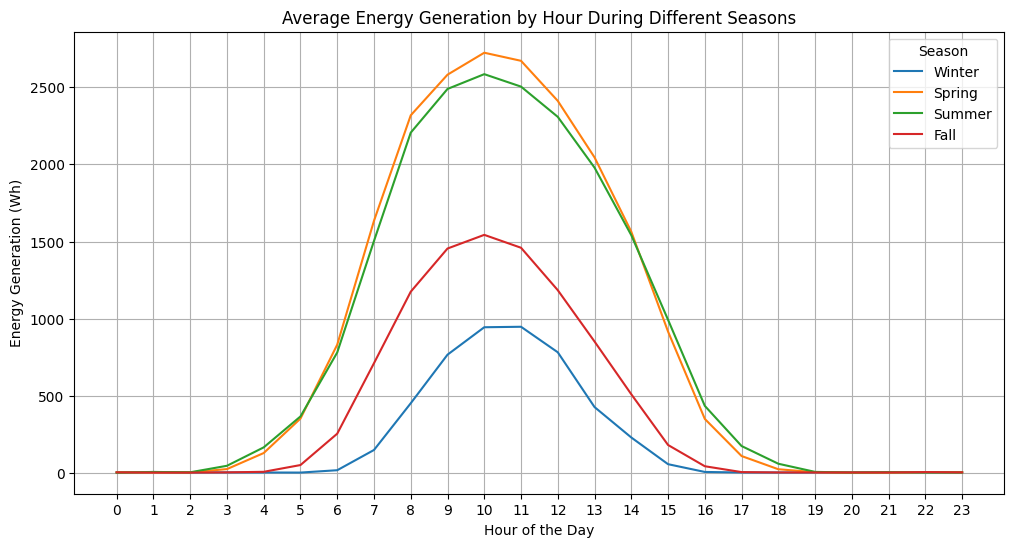

In [26]:
#mapping month to season
month_to_season={
    12:"Winter",1:"Winter",2:"Winter",
    3:"spring",4:"Spring",5:"Spring",
    6:"Summer",7:"Summer",8:"Summer",
    9:"Fall",10:"Fall",11:"Fall"
}
#grouping DataFrame by season (which is derived from the month column)
hourlyseason_data=df.groupby(["hour",df["month"].map(month_to_season)])["Energy delta[Wh]"].mean().reset_index()
hourlyseason_data.columns=["hour","season","Energy delta(Wh)"]

plt.figure(figsize=(12,6))
for season in ["Winter","Spring","Summer","Fall"]:
    season_data=hourlyseason_data[hourlyseason_data["season"]==season]
    plt.plot(season_data["hour"],season_data["Energy delta(Wh)"],label=season)

plt.title("Average Energy Generation by Hour During Different Seasons")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Generation (Wh)")
plt.legend(title="Season")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

From this plot it is evident that spring emerges as the most productive season for solar energy generation, Following closely is summer which also demonstrates substantial energy production. In contrast, both fall and winter showing much lower energy generation. Winter characterized by shorter days, reduced sunlight and potentially adverse weather conditions results in significantly diminished energy production and Fall while better than winter, still fails to reach the levels observed in spring and summer, likely due to decreasing daylight and changing weather patterns. Understanding these seasonal trends can aid companies in optimizing their solar investments and improving energy efficiency strategies.

Question 6: How do extreme weather conditions (such as heavy rainfall) affects short-term and long-term solar energy production?

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\1794880330.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_data=df.groupby(["hour",extreme_conditions])["Energy delta[Wh]"].mean().unstack()


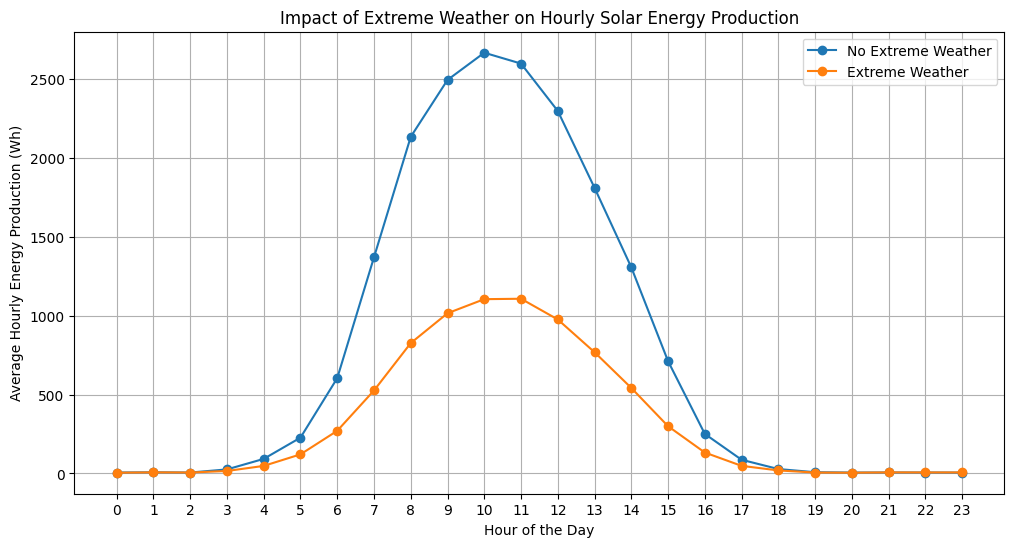

C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\1794880330.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data=df.groupby(["month",extreme_conditions])["Energy delta[Wh]"].mean().unstack()


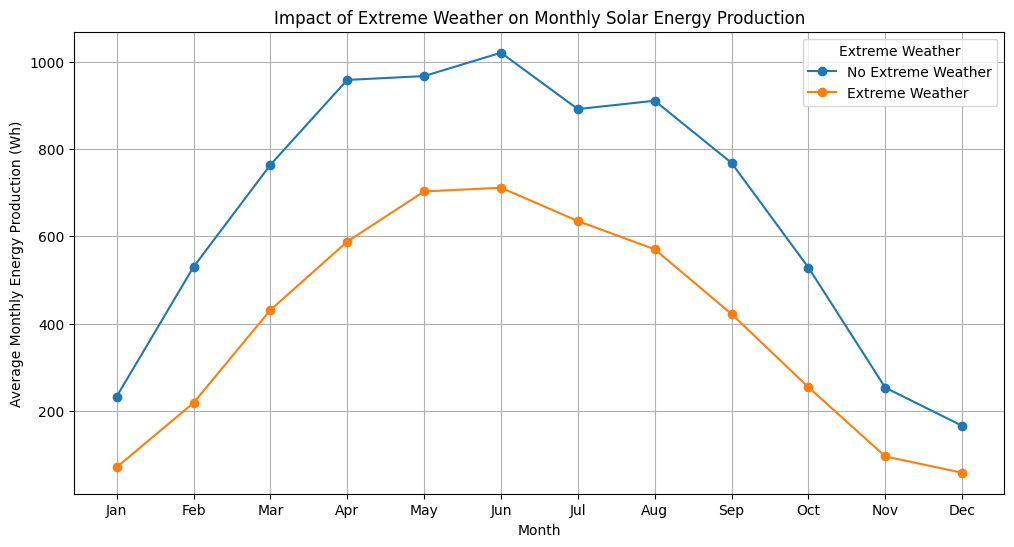

In [50]:
#defining extreme weather conditions
extreme_conditions=(df["wind_speed"]>10)|(df["rain_1h"]>5)|(df["clouds_all"]>90) #for wind speed over 10 m/s, rainfall greater than 5 mm in last 1 hour and cloud coverage over 90%
#adding "extreme_weather" indicator column
df["extreme_weather"]=extreme_conditions.astype(int)

hourly_data=df.groupby(["hour",extreme_conditions])["Energy delta[Wh]"].mean().unstack() #using unstack to result is a DataFrame instead of series
hourly_data.columns=["No Extreme Weather","Extreme Weather"]

# Plotting the hourly data to show short-term impact
plt.figure(figsize=(12,6))
plt.plot(hourly_data.index,hourly_data["No Extreme Weather"],label="No Extreme Weather",linestyle="-",marker="o")
plt.plot(hourly_data.index,hourly_data["Extreme Weather"],label="Extreme Weather",linestyle="-",marker="o")

plt.title("Impact of Extreme Weather on Hourly Solar Energy Production")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Hourly Energy Production (Wh)")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# Plotting the monthly data to show long-term impact
plt.figure(figsize=(12,6))

monthly_data=df.groupby(["month",extreme_conditions])["Energy delta[Wh]"].mean().unstack()
monthly_data.columns=["No Extreme Weather","Extreme Weather"]
plt.plot(monthly_data.index,monthly_data["No Extreme Weather"],label="No Extreme Weather",linestyle="-",marker="o")
plt.plot(monthly_data.index,monthly_data["Extreme Weather"],label="Extreme Weather",linestyle="-",marker="o")

plt.title("Impact of Extreme Weather on Monthly Solar Energy Production")
plt.xlabel("Month")
plt.ylabel("Average Monthly Energy Production (Wh)")
plt.legend(title="Extreme Weather")
plt.grid(True)
plt.xticks(np.arange(1,13),["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()


my findings indicate that energy production is lower during periods classified as extreme weather compared to normal conditions. This information is crucial for solar energy companies as it helps them anticipate production challenges, managing risks, and optimizing resource allocation. therefore companies can develop strategies to improve system resilience and enhance the reliability of solar energy as a sustainable power source.

Question 7 : what time of year experiences the most frequent low-energy production days, and what weather patterns contribute to this?



C:\Users\nima_\AppData\Local\Temp\ipykernel_2864\635970992.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_low_energy=df.groupby(["month","low_energy"])["Energy delta[Wh]"].count().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

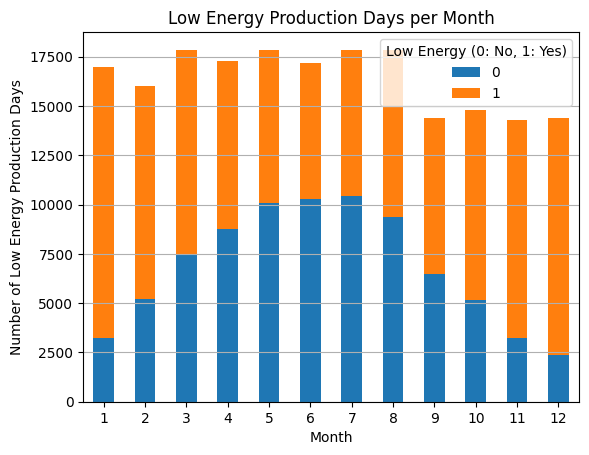

In [51]:
low_energy_days=df['Energy delta[Wh]']<100  #low energy days under 100wh production

#Adding a temporary 'low_energy' column
df["low_energy"]=low_energy_days.astype(int)

monthly_low_energy=df.groupby(["month","low_energy"])["Energy delta[Wh]"].count().unstack().fillna(0)

#Plotting number of low energy production days per month
plt.figure(figsize=(12,6))
monthly_low_energy.plot(kind="bar",stacked=True)
plt.title("Low Energy Production Days per Month")
plt.xlabel("Month")
plt.ylabel("Number of Low Energy Production Days")
plt.xticks(rotation=0)
plt.legend(title="Low Energy (0: No, 1: Yes)")
plt.grid(axis="y")
plt.show()

#Droping the temporary low energy column 
df.drop('low_energy', axis=1, inplace=True)

as its shows in the plot, the number of days with low energy production are greater in last and first 3 months of the year than days with medium or high energy production. This information is essential for solar energy companies as it helps them understand seasonal challenges, optimize operational strategies and make informed decisions regarding maintenance and energy storage.